Topic: Challenge Set **7** <br> Subject: Classification <br> Date: 10/11/2017 <br> Name: Kenny Leung <br> Worked with: -- <br>Location: sf17_ds8/student_submissions/challenges/07-classification/leung_kenny/challenge_set_7_kenny.ipynb

In [60]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import seaborn as sns
import matplotlib.style as style
import random

%matplotlib inline

In [62]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Challenge 1

In [63]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [64]:
df = pd.read_csv(url,header=None)
df = df.replace(['y','n'],[1,0])

In [65]:
issues = dict()
for issue in range(1,17):
    issues[issue] = (df.groupby(issue).count()[0][0], 
                     df.groupby(issue).count()[0][1], 
                     df.groupby(issue).count()[0][0]/(df.groupby(issue).count()[0][0]+df.groupby(issue).count()[0][1]))
    
    df[issue] = df[issue].replace('?',issues[issue][2])

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.637681,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.187311
2,democrat,0.55792,1.0,1.0,0.582547,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.495238,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.576733,1.0,1.0,1.0,1.000000


# Challenge 2

In [66]:
X = df.loc[:,1:16]
y = df.loc[:,0]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

# Challenge 3

Start with k=1

In [68]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_k1 = knn.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test,pred_k1))

Accuracy Score:  0.900763358779


Use the elbow method to figure out k with minimum error.

In [69]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

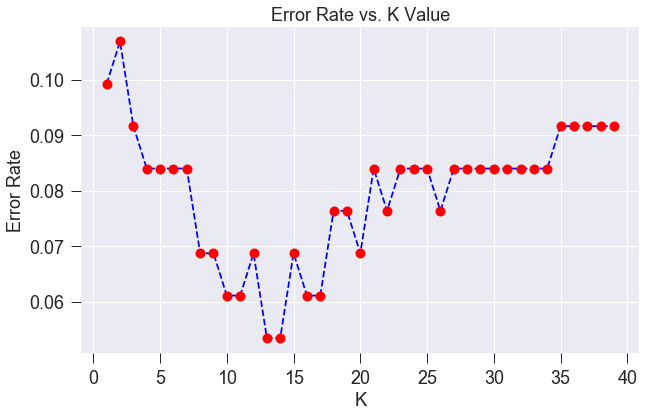

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value',fontsize=18)
plt.tick_params(axis='both',size=10, labelsize=18)
plt.xlabel('K',fontsize=18)
plt.ylabel('Error Rate',fontsize=18)

Re-fit KNN with k=13 (since it has the lowest error-rate).

In [71]:
knn2 = KNeighborsClassifier(n_neighbors=13)
knn2.fit(X_train,y_train)
pred_k13 = knn2.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test,pred_k13))

Accuracy Score:  0.946564885496


# Challenge 4

In [72]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred_log = logmodel.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test,pred_log))

Accuracy Score:  0.93893129771


# Challenge 5

In [73]:
counts = df.groupby(0).count()
counts

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
democrat,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267
republican,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168


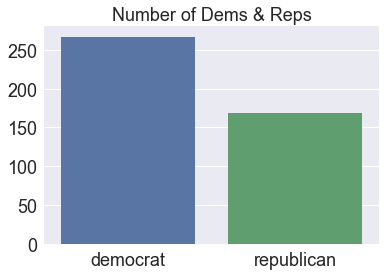

In [74]:
plt.figure(figsize=(6,4))

sns.barplot(counts.index,counts[1])
plt.title('Number of Dems & Reps', fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.xlabel('')
plt.ylabel('')

In [75]:
test_size = y_test.shape[0]

def predict_democrat():
    return np.array(['democrat'] * test_size)

def predict_republican():
    return np.array(['republican'] * test_size)

predict_democrat = predict_democrat()
predict_republican = predict_republican()

In [76]:
print('Predicting All Democrat:')
print('Accuracy Score: ',accuracy_score(y_test,predict_democrat))
print('\n')
print('Predicting All Republicans:')
print('Accuracy Score: ',accuracy_score(y_test,predict_republican))

Predicting All Democrat:
Accuracy Score:  0.587786259542


Predicting All Republicans:
Accuracy Score:  0.412213740458


# Challenge 6

In [77]:
accuracy = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred_i))

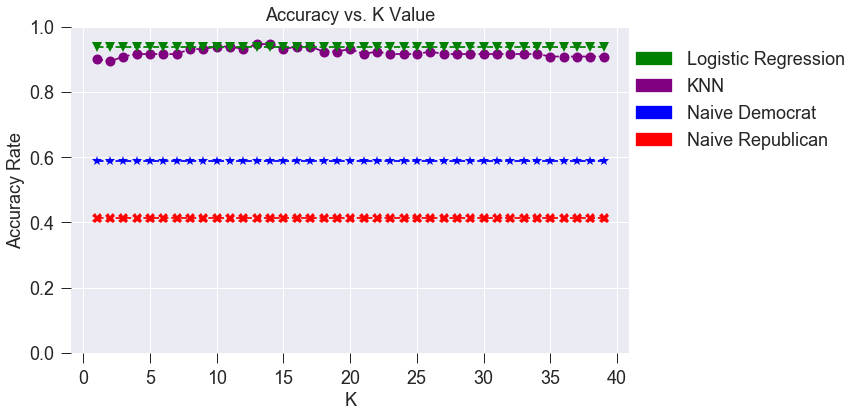

In [78]:
plt.figure(figsize=(10,6))
green_patch = mpatches.Patch(color='green', label='Logistic Regression')
purple_patch = mpatches.Patch(color='purple', label='KNN')
red_patch = mpatches.Patch(color='red', label='Naive Republican')
blue_patch = mpatches.Patch(color='blue', label='Naive Democrat')
plt.legend(handles=[green_patch,purple_patch,blue_patch,red_patch,],prop={'size': 18},loc=(1,0.6))

plt.plot(range(1,40),accuracy,color='purple', linestyle='dashed', marker='o',
         markerfacecolor='purple', markersize=10)
plt.plot(range(1,40),[accuracy_score(y_test,pred_log)]*len(range(1,40)),color='green', linestyle='dashed',
         marker='v',markerfacecolor='green', markersize=10)
plt.plot(range(1,40),[accuracy_score(y_test,predict_democrat)]*len(range(1,40)),color='blue', linestyle='dashed', 
         marker='*', markerfacecolor='blue', markersize=10)
plt.plot(range(1,40),[accuracy_score(y_test,predict_republican)]*len(range(1,40)),color='red', linestyle='dashed', 
         marker='X', markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. K Value',fontsize=18)
plt.xlabel('K',fontsize=18)
plt.ylabel('Accuracy Rate',fontsize=18)
plt.ylim((0,1))
plt.tick_params(axis='both',size=10, labelsize=18)

# Challenge 7

In [79]:
train_sizes, train_err, ts_err = learning_curve(LogisticRegression(),X,y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

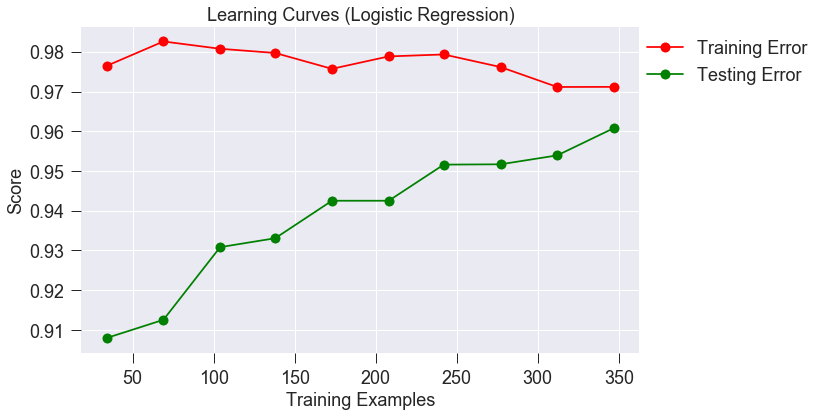

In [80]:
plt.figure(figsize=(10,6))
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=10, label='Training Error')
green_line = mlines.Line2D([], [], color='green', marker='o', markersize=10, label='Testing Error')
plt.legend(handles=[red_line,green_line],prop={'size': 18},loc=(1,0.8))

plt.plot(train_sizes,train_cv_err,color='red', marker='o', markerfacecolor='red', markersize=10)
plt.plot(train_sizes,test_cv_err,color='green', marker='o', markerfacecolor='green', markersize=10)

plt.title('Learning Curves (Logistic Regression)',fontsize=18)
plt.xlabel('Training Examples',fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.tick_params(axis='both',size=10, labelsize=18)

In [81]:
train_sizes, train_err, ts_err = learning_curve(KNeighborsClassifier(n_neighbors=13),X,y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

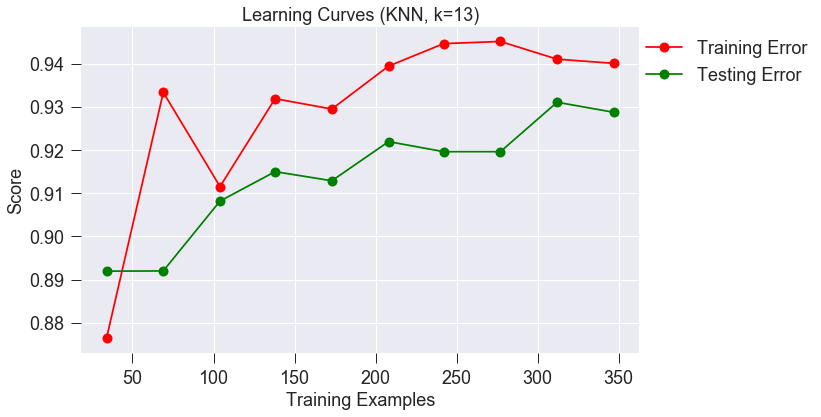

In [82]:
plt.figure(figsize=(10,6))
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=10, label='Training Error')
green_line = mlines.Line2D([], [], color='green', marker='o', markersize=10, label='Testing Error')
plt.legend(handles=[red_line,green_line],prop={'size': 18},loc=(1,0.8))

plt.plot(train_sizes,train_cv_err,color='red', marker='o', markerfacecolor='red', markersize=10)
plt.plot(train_sizes,test_cv_err,color='green', marker='o', markerfacecolor='green', markersize=10)

plt.title('Learning Curves (KNN, k=13)',fontsize=18)
plt.xlabel('Training Examples',fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.tick_params(axis='both',size=10, labelsize=18)

# Challenge 8

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
models=[GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    print(model,'\nAccuracy Score: ',accuracy_score(y_test,prediction))
    print('-----------------------------------------------------------------------------')

GaussianNB(priors=None) 
Accuracy Score:  0.93893129771
-----------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
Accuracy Score:  0.954198473282
-----------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
Accuracy Score:  0.946564885496
-----------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='

# Challenge 9

In [85]:
models=[GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    print(model,'\nCross Validation Score: ',np.mean(cross_val_score(model,X,y,cv=5)))
    print('-----------------------------------------------------------------------------')

GaussianNB(priors=None) 
Cross Validation Score:  0.944795387718
-----------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
Cross Validation Score:  0.954018128357
-----------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
Cross Validation Score:  0.937712327768
-----------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class

# Challenge 10

In [86]:
df2 = pd.read_csv(url,header=None)
df2 = df2.replace(['y','n'],[1,0])

In [87]:
for issue in range(1,17):
    df2[issue] = df2[issue].replace('?',int(df2[issue].mode()))

df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [88]:
X = df2.loc[:,1:15]
y = df2.loc[:,16]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [90]:
models=[GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    print(model,'\nCross Validation Score: ',np.mean(cross_val_score(model,X,y,cv=5)))
    print('-----------------------------------------------------------------------------')

GaussianNB(priors=None) 
Cross Validation Score:  0.772574178027
-----------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
Cross Validation Score:  0.857508930524
-----------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
Cross Validation Score:  0.807112828364
-----------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class

# Challenge 11

In [91]:
df3 = pd.read_csv('/Users/kennyleung/_ds/metis/metisgh/sf17_ds8/challenges/challenges_data/2013_movies.csv')

In [92]:
df3.dropna(axis=0,how='any',inplace=True)

In [93]:
df3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [94]:
counts = df3.groupby('Rating').count()
counts

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate
Rating,,,,,,
PG,14,14,14,14,14,14
PG-13,40,40,40,40,40,40
R,33,33,33,33,33,33


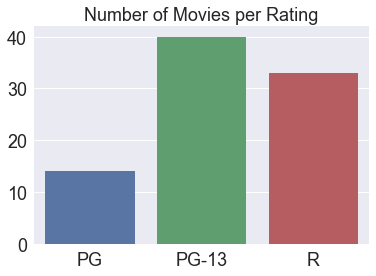

In [95]:
plt.figure(figsize=(6,4))

sns.barplot(counts.index,counts['Title'])
plt.title('Number of Movies per Rating', fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.xlabel('')
plt.ylabel('')

In [96]:
X = df3.loc[:,['Budget','DomesticTotalGross','Runtime']]
y = df3.loc[:,'Rating']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [98]:
models=[KNeighborsClassifier(), LogisticRegression()]

for model in models:
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    print(model,'\nAccuracy Score: ',accuracy_score(y_test,prediction))
    print('-----------------------------------------------------------------------------')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 
Accuracy Score:  0.555555555556
-----------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
Accuracy Score:  0.444444444444
-----------------------------------------------------------------------------


In [99]:
test_size = y_test.shape[0]

def stupid_predictor():
    return np.array([df3['Rating'].mode()[0]] * test_size)

stupid_prediction = stupid_predictor()

In [100]:
print('Predicting All Democrat:')
print('Accuracy Score: ',accuracy_score(y_test,stupid_prediction))

Predicting All Democrat:
Accuracy Score:  0.407407407407


In [101]:
model.coef_

array([[ -1.46124379e-08,  -1.93897623e-09,  -1.75965536e-13],
       [  1.49848414e-08,  -6.42667083e-09,  -9.13751595e-14],
       [ -2.30763200e-08,   5.12598612e-09,   1.16458130e-13]])

In [102]:
model.classes_

array(['PG', 'PG-13', 'R'], dtype=object)

KNN performed better than the stupid predictor by around 15%, while the Logistic Regression model performed better by 4%. Budget negatively affects PG and R films, and positively affects PG-13 films. Total Gross and Runtime negatively affects PG and PG-13 films, and positively affects R films.  

# Challenge 12

In [103]:
df4 = pd.read_csv('/Users/kennyleung/_ds/metis/metisgh/sf17_ds8/challenges/challenges_data/haberman.data',header=None)

In [104]:
df4.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [105]:
print('Mean age: ',df4[0].mean())
print('Standard deviation age: ',df4[0].std())

Mean age:  52.45751633986928
Standard deviation age:  10.80345234930328


In [106]:
df5 = df4[df4[3]==1]
print('Mean age: ',df5[0].mean())
print('Standard deviation age: ',df5[0].std())

Mean age:  52.01777777777778
Standard deviation age:  11.012154179929546


In [107]:
df6 = df4[df4[3]==2]
print('Mean age: ',df6[0].mean())
print('Standard deviation age: ',df6[0].std())

Mean age:  53.67901234567901
Standard deviation age:  10.16713720829741


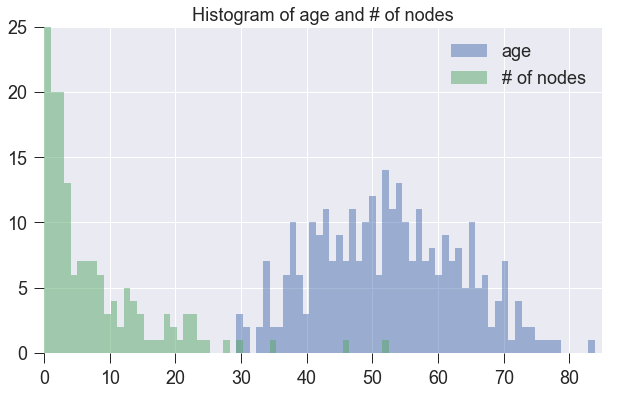

In [108]:
bins = np.linspace(0, 100, 100)
plt.figure(figsize=(10,6))

plt.hist(df4[0], bins, alpha=0.5, label='age')
plt.hist(df4[2], bins, alpha=0.5, label='# of nodes')
plt.legend(prop={'size': 18},loc='upper right')

plt.title('Histogram of age and # of nodes',fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.xlim((0,85))
plt.ylim((0,25))
plt.tick_params(axis='both',size=10, labelsize=18)

In [109]:
df4[1].sort_values().head(1)

305    58
Name: 1, dtype: int64

Earliest year of surgery in this data set is 1985.

In [110]:
df4[1].sort_values(ascending=False).head(1)

90    69
Name: 1, dtype: int64

The most recent year of surgery is 1969.

In [111]:
X = df4.loc[:,:2]
y = df4.loc[:,3]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [113]:
haberman_model = LogisticRegression()
haberman_model.fit(X_train,y_train)
prediction = haberman_model.predict(X_test)

In [114]:
print('Accuracy Score: ',accuracy_score(y_test,prediction))

Accuracy Score:  0.815217391304


In [115]:
haberman_model.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

In [116]:
haberman_model.classes_

array([1, 2])

Age and number of nodes correlates to a patient dying within 5 years of surgery, whereas year of surgery has a negative correlation to a patient dying within 5 years.